In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Importando os dados ObservaSampa e Geosampa

dados_Observa = pd.read_csv(r"C:\Users\Thomaz David\Desktop\Desafio\observasampa_familias_extrema_pobreza.csv")


dados_Geosampa = pd.read_csv(r'C:\Users\Thomaz David\Desktop\Desafio\geosampa_distritos.csv')


In [19]:
#Questão 1 - Qual a quantidade de famílias em extrema pobreza na cidade de São Paulo no ano de 2023?

#Filtrando os dados de 2023

dados_Observa_2023 = dados_Observa[dados_Observa['ano'] == 2023]

#Calculando a quantidade de famílias em extrema pobreza em 2023

quantidade_familias_pob_total = dados_Observa_2023['qtd_familias'].sum()
# Formatando o resultado com ponto como separador de milhares
quantidade_familias_pob_total = "{:,.0f}".format(quantidade_familias_pob_total).replace(',', '.')

print("A quantidade de familias em extrema pobreza na cidade de São Paulo é de", quantidade_familias_pob_total,)

A quantidade de familias em extrema pobreza na cidade de São Paulo é de 765.114


In [4]:
#Questão 2 - Qual o percentual (Em relação ao total da cidade)de famílias em extrema pobreza por distrito na cidade de São Paulo no ano de 2023?
#obs: eu pensei em criar um laço de repetição para dividir cada linha da coluna 'qtd_familias' pela soma total de famílias em extrema pobreza na cidade * 100, mas não consegui fazer isso kkk...
#tive uma ideia "melhor", vou criar uma coluna nova e preencher ela com a variavel qtd_familias / quantidade_familias_pob_total * 100.

# Calcular o total de famílias pobres na cidade em 2023
quantidade_familias_pob_total = dados_Observa_2023['qtd_familias'].sum()

# Criar uma nova coluna no DataFrame para armazenar os percentuais
dados_Observa_2023['percentual'] = (dados_Observa_2023['qtd_familias'] / quantidade_familias_pob_total) * 100

dados_Observa_2023['percentual'] = dados_Observa_2023['percentual'].map('{:.2f}%'.format)

print(dados_Observa_2023)



               distrito   ano  qtd_familias            ds_nome percentual
960     Parque Do Carmo  2023        5959.0    PARQUE DO CARMO      0.78%
961            Pedreira  2023       17371.0           PEDREIRA      2.27%
962               Penha  2023        6701.0              PENHA      0.88%
963            Perdizes  2023         597.0           PERDIZES      0.08%
964               Perus  2023       10360.0              PERUS      1.35%
...                 ...   ...           ...                ...        ...
1051        Campo Limpo  2023       14194.0        CAMPO LIMPO      1.86%
1052       Cidade Dutra  2023       11839.0       CIDADE DUTRA      1.55%
1053       Cidade Líder  2023       10071.0       CIDADE LIDER      1.32%
1054  Cidade Tiradentes  2023       22712.0  CIDADE TIRADENTES      2.97%
1055         Consolação  2023         461.0         CONSOLACAO      0.06%

[96 rows x 5 columns]


C:\Users\Thomaz David\AppData\Local\Temp\ipykernel_6908\2421639424.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_Observa_2023['percentual'] = (dados_Observa_2023['qtd_familias'] / quantidade_familias_pob_total) * 100
C:\Users\Thomaz David\AppData\Local\Temp\ipykernel_6908\2421639424.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_Observa_2023['percentual'] = dados_Observa_2023['percentual'].map('{:.2f}%'.format)


In [34]:
#Questão 3 - Qual distrito apresentou o maior aumento de familias em situação de pobreza entre 2022 e 2023?


# df dos dados dos anos de 2022 e 2023
df_2022 = dados_Observa[dados_Observa['ano'] == 2022]
df_2023 = dados_Observa[dados_Observa['ano'] == 2023]

df_resultado = df_2023.groupby('distrito')['qtd_familias'].sum() - df_2022.groupby('distrito')['qtd_familias'].sum()

df_resultado_formato = int(df_resultado.max())

print("O distrito com o maior aumento de famílias em situação de pobreza entre 2022 e 2023 foi: o", df_resultado.idxmax(), "com um aumento de:",df_resultado_formato, "famílias")





''

O distrito com o maior aumento de famílias em situação de pobreza entre 2022 e 2023 foi: o Grajaú com um aumento de: 5812 famílias


''

In [6]:
#Questão 4 - Qual a quantidade de famílias em extrema pobreza por subprefeitura na cidade de São Paulo no ano de 2023?

resultado = pd.merge(df_2023, dados_Geosampa, on='ds_nome', how='left')

resultado = resultado.groupby('ds_subpref')['qtd_familias'].sum()

print(resultado)


ds_subpref
ARICANDUVA-FORMOSA-CARRAO    11267.0
BUTANTA                      18099.0
CAMPO LIMPO                  38395.0
CAPELA DO SOCORRO            47173.0
CASA VERDE-CACHOEIRINHA      16810.0
CIDADE ADEMAR                44446.0
CIDADE TIRADENTES            22712.0
ERMELINO MATARAZZO           15760.0
FREGUESIA-BRASILANDIA        31033.0
GUAIANASES                   27741.0
IPIRANGA                     20947.0
ITAIM PAULISTA               37587.0
ITAQUERA                     39223.0
JABAQUARA                    13725.0
JACANA-TREMEMBE              20897.0
LAPA                          6372.0
M BOI MIRIM                  47031.0
MOOCA                        24634.0
PARELHEIROS                  17638.0
PENHA                        27499.0
PERUS                        17680.0
PINHEIROS                     2357.0
PIRITUBA-JARAGUA             30399.0
SANTANA-TUCURUVI             10476.0
SANTO AMARO                   7670.0
SAO MATEUS                   41585.0
SAO MIGUEL                 

C:\Users\Thomaz David\AppData\Local\Temp\ipykernel_6908\4114910699.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_Observa_2013_2023.drop(columns=['ds_nome'], inplace=True)


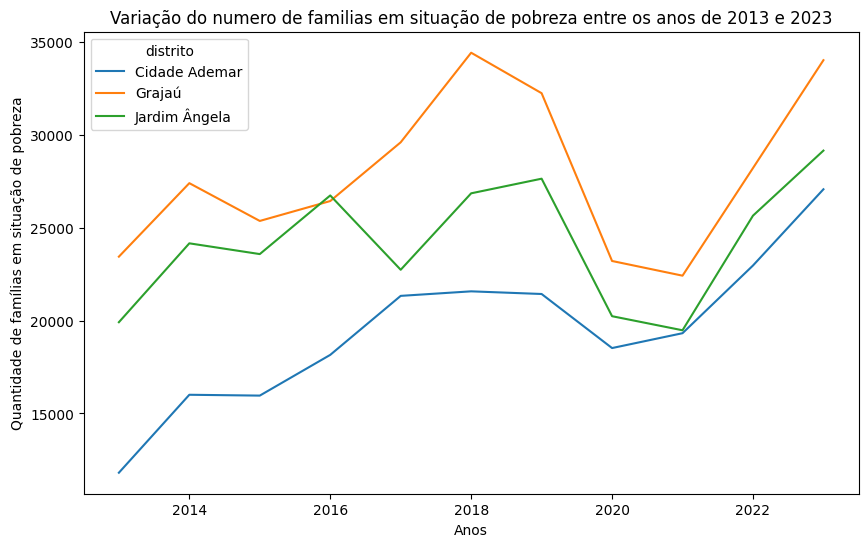

distrito  Cidade Ademar   Grajaú  Jardim Ângela
ano                                            
2013            11807.0  23445.0        19914.0
2014            16006.0  27404.0        24163.0
2015            15961.0  25369.0        23584.0
2016            18155.0  26441.0        26742.0
2017            21333.0  29605.0        22739.0
2018            21577.0  34430.0        26857.0
2019            21434.0  32250.0        27645.0
2020            18522.0  23212.0        20238.0
2021            19322.0  22421.0        19480.0
2022            22968.0  28216.0        25653.0
2023            27075.0  34028.0        29158.0


In [7]:
#Questão 5 - Como variou o número de famílias em situação de pobreza entre 2013 e 2023 nos
#Distritos de Grajaú, Jardim Ângela, Cidade Ademar? Exiba graficamente o resultado,
#escolhendo a visualização que achar mais adequada.


# Filtrar os dados para os distritos específicos e os anos de 2013 e 2023

dados_Observa_2013_2023 = dados_Observa[dados_Observa['distrito'].isin(['Grajaú', 'Jardim Ângela', 'Cidade Ademar'])]

dados_Observa_2013_2023.drop(columns=['ds_nome'], inplace=True)

dados_Observa_2013_2023 = dados_Observa_2013_2023.pivot(index='ano', columns='distrito', values='qtd_familias')

dados_Observa_2013_2023.plot(kind='line', figsize=(10, 6))
plt.title('Variação do numero de familias em situação de pobreza entre os anos de 2013 e 2023')
plt.ylabel('Quantidade de famílias em situação de pobreza')
plt.xlabel('Anos')
plt.show()


print(dados_Observa_2013_2023)

In [50]:
# Questão 6 -  Complete a seguinte frase: De acordo com os dados do ObservaSampa, em 2023
# metade dos Distritos de São Paulo, tem no máximo, ___ famílias em situação de extrema
# pobreza". Qual informação você utilizou par acompletar a frase?

dados_Observa_2023.drop(columns=['ds_nome'])

# Calcular a mediana do número de famílias em situação de extrema pobreza
mediana_familias_extrema_pobreza = dados_Observa_2023['qtd_familias'].median()

print("Metade dos distritos de São Paulo, em 2023, tem no máximo {:.0f} famílias em situação de extrema pobreza.".format(mediana_familias_extrema_pobreza))

#Resposta da questão 6: Utilizei a mediana do número de famílias em situação de extrema pobreza em 2023 para completar a frase.
#Eu fiquei na duvida sobre a questão pois acredito que faltava um valor para completar a frase, mas acredito que a resposta seja essa.

Metade dos distritos de São Paulo, em 2023, tem no máximo 5610 famílias em situação de extrema pobreza.
